# Craig Kimbrel

# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
    - [Index DataFrame to Get Pitch Types](#Index-DataFrame-to-Get-Pitch-Types)
- [Pitcher Overview](#Pitcher-Overview)
    - [General Pitch Data](#General-Pitch-Data)
    - [Pitch Usage](#Pitch-Usage)
    - [Pitch Usage by Batter Handedness](#Pitch-Usage-by-Batter-Handedness)
    - [Velocity by Pitch Type](#Velocity-by-Pitch-Type)
    - [Pitch Velocity by Inning](#Pitch-Velocity-by-Inning)
- [Pitcher Stuff](#Pitcher-Stuff)
    - [Spin Rate by Pitch Type](#Spin-Rate-by-Pitch-Type)
    - [Spin Axis](#Spin-Axis)
    - [Spin Efficiency](#Spin-Efficiency)
    - [HB & VB Axis](#Horizontal-&-Vertical-Break-Axis)
    - [HB & HB Due to Magnus Force](#Horizontal-&-Vertical-Break-Due-to-Magnus-Force-Axis)
    - [Release Position](#Release-Postion)
    - [Release Extension](#Release-Extension-Side-View)
    - [Velocity & Spin Rate](#Velocity-&-Spin-Rate)
    - [Avg. Bauer Units by Pitch Type](#Bauer-Units)
- [Count Breakdown](#Count-Breakdown)
    - [Pitch Usage by Count](#Pitch-Usage-by-Count)
- [Heatmaps](#Heatmaps)
    - [Pitch Location by Pitch Type](#Pitch-Location-by-Pitch-Type)
    - [Hard Hit Summary by Pitch Type](#Hard-Hit-Summary-by-Pitch-Type)
    - [4-Seam Heatmaps](#Fastball-Heatmaps)
    - [Knuckle Curve Heatmaps](#Knuckle-Curve-Heatmaps)

# Imports

In [1]:
import math
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
kimbrel = pd.read_csv('../data/craig-kimbrel.csv')
kimbrel.drop(columns = ['Unnamed: 0'], inplace = True)
kimbrel.dropna(subset = ['pitch_type'], inplace = True)

# Font Dictionary
font_title = {
    'size': 14,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(kimbrel.shape)
kimbrel.head(2)

(986, 84)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Mx,Mz,phi,theta,is_strike,pitch_count,plate_-x,pfx_-x,M-x,spin_eff,spin_eff%,true_spin,bauer_units,swing_miss
0,FF,2021-08-31,95.6,-2.78,4.88,"Kimbrel, Craig",607732,518886,out,hit_into_play,3.0,Jacob Stallings lines out to center fielder Lu...,R,R,CWS,PIT,X,8.0,line_drive,0,0,2021,-0.85,14.52,0.55,3.09,NaN,NaN,NaN,2,8,Top,106.41,73.67,518735,10.772572,-138.991854,-1.870993,-13.306069,28.284254,-16.163792,3.58,1.68,315.0,91.0,23.0,96.7,2283.0,6.7,632683,53.76,0.169,0.182,0.0,1.0,0.0,0.0,3.0,62,1,4-Seam Fastball,4,2,2,4,Standard,Standard,225.0,0.013,-0.103,NaN,NaN,NaN,NaN,1,0-0,-0.55,10.20,NaN,NaN,NaN,NaN,23.880753,0
1,KC,2021-08-31,86.2,-2.98,5.00,"Kimbrel, Craig",592567,518886,strikeout,swinging_strike,14.0,Colin Moran strikes out swinging.,L,R,CWS,PIT,S,2.0,NaN,2,2,2021,0.69,-4.32,0.41,0.91,NaN,NaN,NaN,1,8,Top,NaN,NaN,518735,6.694156,-125.548578,-2.842071,6.145253,22.529070,-35.683472,3.55,1.63,NaN,NaN,NaN,86.9,2412.0,6.5,632683,54.04,NaN,NaN,0.0,1.0,0.0,0.0,NaN,61,5,Knuckle Curve,4,2,2,4,Strategic,Standard,63.0,0.023,-0.142,NaN,NaN,NaN,NaN,1,2-2,-0.41,-8.28,NaN,NaN,NaN,NaN,27.981439,1


In [3]:
kimbrel.groupby('pitch_type').mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,spin_axis,delta_home_win_exp,delta_run_exp,Mx,Mz,phi,theta,is_strike,plate_-x,pfx_-x,M-x,spin_eff,spin_eff%,true_spin,bauer_units,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FF,96.517436,-2.949983,4.779795,596628.485470,518886.0,8.153846,4.572650,1.088889,0.979487,2021.0,-0.856256,14.643487,0.257009,2.804256,615629.181818,593879.589474,596818.515152,0.970940,8.608547,129.917222,103.991667,581904.095726,10.519809,-140.171021,-2.462832,-13.657681,31.364367,-15.694391,3.386564,1.581812,221.854651,85.513372,32.162791,96.875214,2301.417094,6.576581,633475.459829,53.921966,0.305028,0.373014,0.292708,1.0,0.111111,0.173611,3.666667,69.885470,3.167521,3.562393,4.005128,4.017094,3.576068,225.181197,-0.001713,-0.009169,-10.598334,13.656083,217.770642,47.513761,0.644444,-0.257009,10.275077,10.598334,0.670275,67.027523,1527.904587,23.843141,0.129915
KC,86.076559,-2.891172,4.919277,604564.184539,518886.0,11.336658,3.924051,0.675810,0.962594,2021.0,0.867581,-5.713616,0.456908,1.369825,613497.054054,586304.518987,598919.687500,1.057357,8.610973,113.084167,125.921667,583399.625935,6.217230,-125.254020,-1.238850,7.899309,24.783017,-37.142526,3.364688,1.572768,128.015152,80.259091,6.181818,86.450623,2557.793017,6.482045,633422.413965,54.018354,0.298667,0.294861,0.151163,1.0,0.104651,0.000000,2.972222,68.620948,2.753117,3.294264,3.548628,3.548628,3.304239,56.112219,-0.003259,-0.031037,10.534745,-8.061849,412.457447,68.159574,0.613466,-0.456908,-10.410973,-10.534745,0.369894,36.989362,952.415745,29.717947,0.254364


In [4]:
gen_data = kimbrel[['pitch_type', 'release_speed', 'release_spin_rate',
                    'true_spin', 'spin_eff', 'phi', 'pfx_z', 'pfx_-x',
                    'is_strike', 'release_pos_x', 'release_pos_z', 'bauer_units']]
col_dict = {
    'release_speed': 'velo', 'release_spin_rate': 'spin', 'phi': 'spin_axis', 'pfx_z': 'hb', 'pfx_-x': 'vb',
    'is_strike': 'strike', 'release_pos_z': 'r_height', 'release_pos_x': 'r_side'
}
gen_data.rename(columns = col_dict, inplace = True)

hit_labels = [1, 2, 3, 4, 5]
kimbrel['hard_hit_summary'] = pd.qcut(kimbrel['launch_speed'], [0, .5262, .617, .7283, .8278, 1], 
                                      labels = hit_labels)

### Index DataFrame to Get Pitch Types

In [5]:
#kimbrel.pitch_type.value_counts(normalize = True)
r_kimbrel = kimbrel.loc[kimbrel['stand'] == 'R']
l_kimbrel = kimbrel.loc[kimbrel['stand'] == 'L']
# all hitters
ff = kimbrel.loc[kimbrel['pitch_type'] == 'FF']
kc = kimbrel.loc[kimbrel['pitch_type'] == 'KC']
# RHH
r_ff = r_kimbrel.loc[r_kimbrel['pitch_type'] == 'FF'] 
r_kc = r_kimbrel.loc[r_kimbrel['pitch_type'] == 'KC']
# LHH
l_ff = l_kimbrel.loc[l_kimbrel['pitch_type'] == 'FF']
l_kc = l_kimbrel.loc[l_kimbrel['pitch_type'] == 'KC']
order = ['FF', 'KC']

ff_tilt = ff['phi'].mean()
kc_tilt = kc['phi'].mean()

# Pitcher Overview

### General Pitch Data

In [6]:
gen_data.groupby(['pitch_type'], sort = False).mean()

,velo,spin,true_spin,spin_eff,spin_axis,hb,vb,strike,r_side,r_height,bauer_units
pitch_type,,,,,,,,,,,
FF,96.517436,2301.417094,1527.904587,0.670275,217.770642,14.643487,10.275077,0.644444,-2.949983,4.779795,23.843141
KC,86.076559,2557.793017,952.415745,0.369894,412.457447,-5.713616,-10.410973,0.613466,-2.891172,4.919277,29.717947


### Pitch Usage

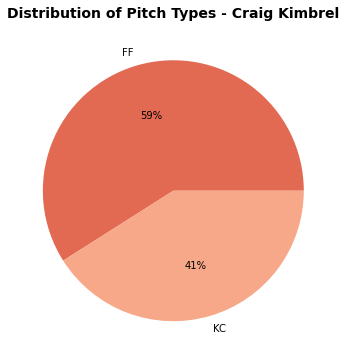

In [7]:
plt.figure(figsize = (8, 6))

dist = round(kimbrel.pitch_type.value_counts(normalize = True), 2)
color = sns.color_palette('coolwarm_r')
plt.pie(dist, labels = order, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Craig Kimbrel', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

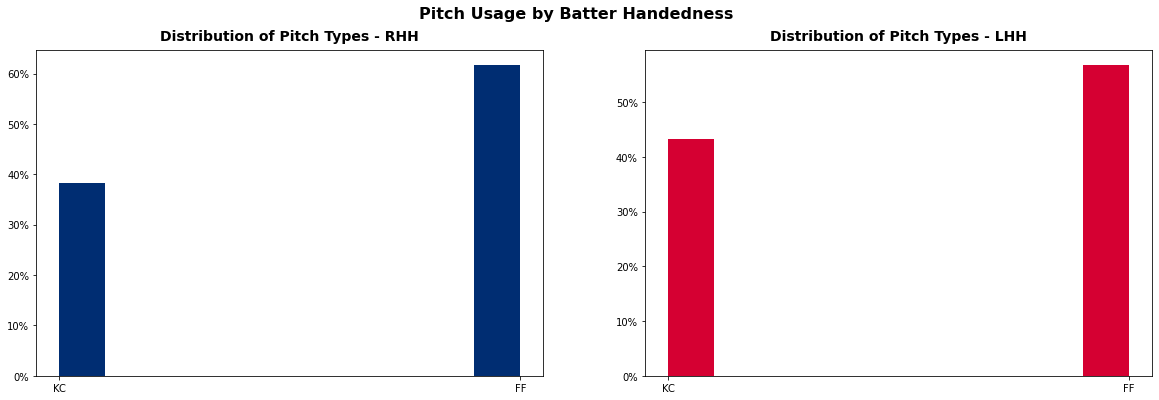

In [8]:
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 16, fontweight = 'bold')
dist_r = r_kimbrel.pitch_type.sort_values(ascending = False)
weights = np.ones(len(dist_r)) / len(dist_r)
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)
dist_l = l_kimbrel.pitch_type.sort_values(ascending = False)
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

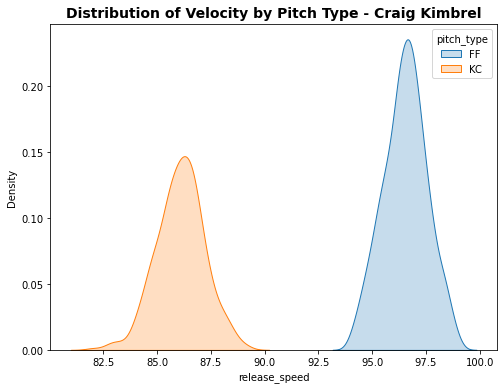

In [9]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = kimbrel, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = order, palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type - Craig Kimbrel', fontdict = font_title, pad = 12);

### Pitch Velocity by Inning

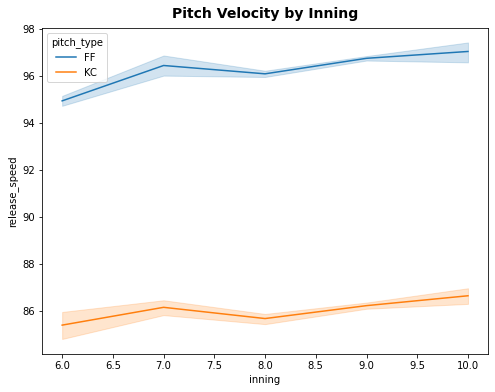

In [10]:
plt.figure(figsize = (8, 6))

sns.lineplot(data = kimbrel, x = 'inning', y = 'release_speed', hue = 'pitch_type',
             hue_order = order, palette = 'tab10')
plt.title('Pitch Velocity by Inning', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Spin Rate by Pitch Type

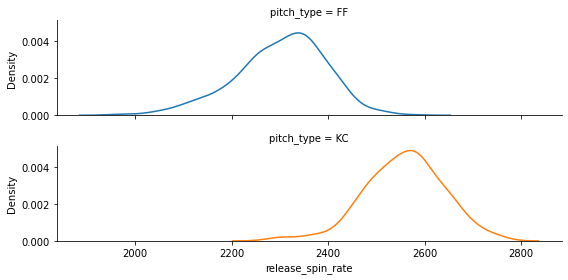

In [11]:
g = sns.FacetGrid(kimbrel, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4)
g.map(sns.kdeplot, 'release_spin_rate', palette = 'tab10');

### Spin Axis

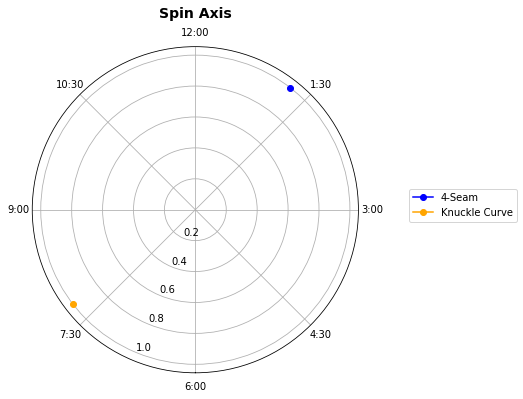

In [12]:
ax = plt.figure(figsize = (8, 6))

ax = plt.subplot(polar = True, theta_direction = -1)
ax.plot(math.radians(ff_tilt), 1, color = 'blue', marker = 'o', label = '4-Seam')
ax.plot(math.radians(kc_tilt), 1, color = 'orange', marker = 'o', label = 'Knuckle Curve')
ticks = ['6:00', '7:30', '9:00', '10:30', '12:00', '1:30', '3:00', '4:30']
ax.set_xticklabels(ticks), ax.legend(bbox_to_anchor=(1.5, .58)), ax.set_theta_zero_location("S")
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Spin Efficiency

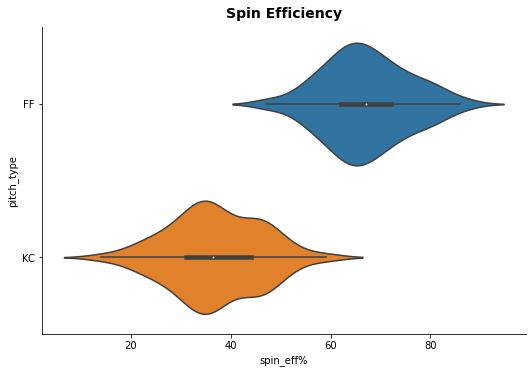

In [13]:
sns.catplot(data = kimbrel, x = 'spin_eff%', y = 'pitch_type', kind = 'violin', aspect= 1.5, palette = 'tab10')
plt.title('Spin Efficiency', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

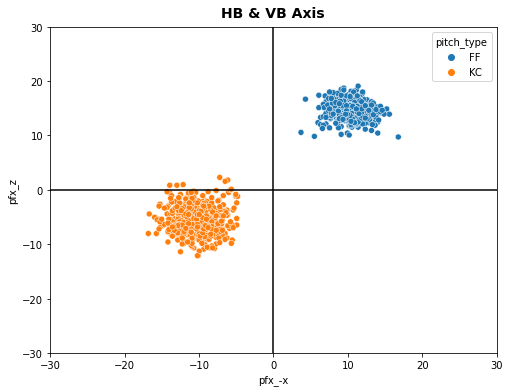

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Due to Magnus Force Axis

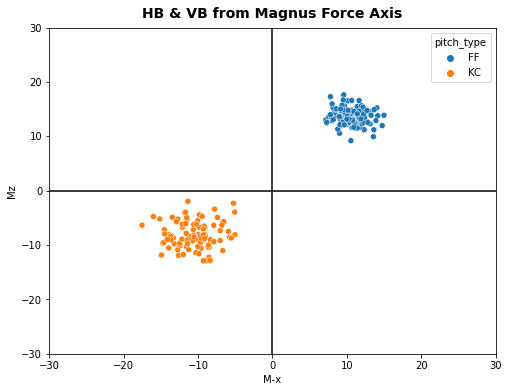

In [15]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'M-x', y = 'Mz', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB from Magnus Force Axis', fontdict = font_title, pad = 15);

### Release Postion

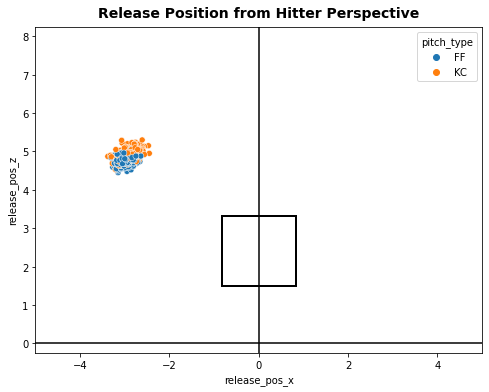

In [16]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                 hue_order = order, palette = 'tab10')
plt.xlim(-5, 5), plt.ylim(-0.25, 8.25)
plt.axvline(0, color = 'black'), plt.axhline(0, color = 'black')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

### Release Extension - Side View

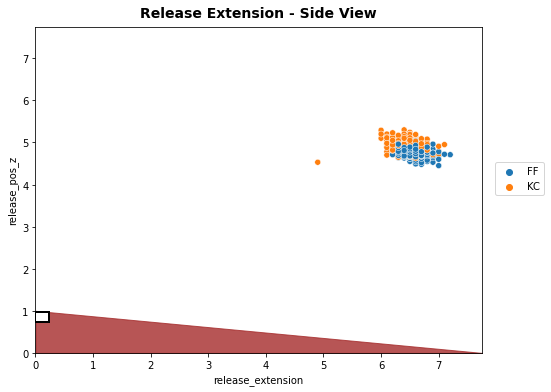

In [17]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'release_extension', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(0, 7.75), plt.ylim(0, 7.75)
plt.gca().add_patch(Rectangle((0, .74), .24, .24, fill = True, fc = 'white', ec = 'black', linewidth = 2))
plt.fill_between((7.75, 0), (0, 1), color = 'brown', alpha = .8)
plt.legend(bbox_to_anchor=(1.15, .6))
plt.title('Release Extension - Side View', fontdict = font_title, pad = 15);

### Velocity & Spin Rate

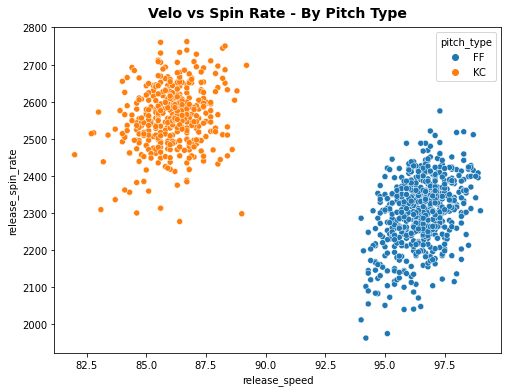

In [18]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.title('Velo vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Bauer Units

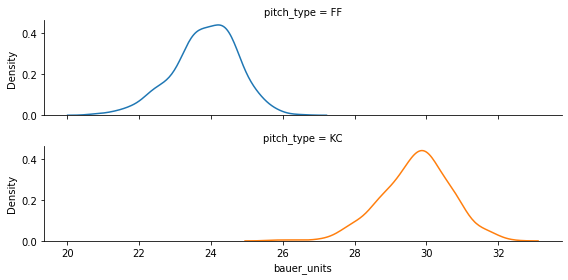

In [19]:
g = sns.FacetGrid(kimbrel, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, )
g.map(sns.kdeplot, 'bauer_units', palette = 'tab10');

# Count Breakdown

### Pitch Usage by Count

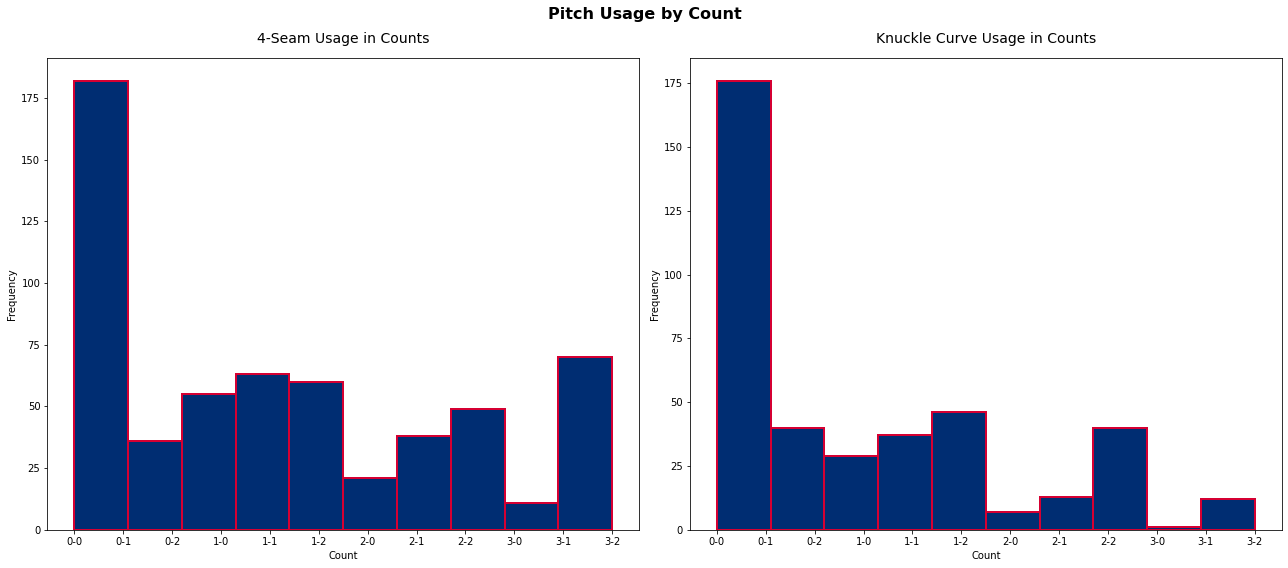

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Pitch Usage by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:], xlabel = 'Count')
plt.setp(axs[0:], ylabel = 'Frequency')
axs[0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0].set_title('4-Seam Usage in Counts', fontsize = 14, pad = 15)
axs[1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1].set_title('Knuckle Curve Usage in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Heatmaps
*All From Hitters' Perspective

### Pitch Location by Pitch Type

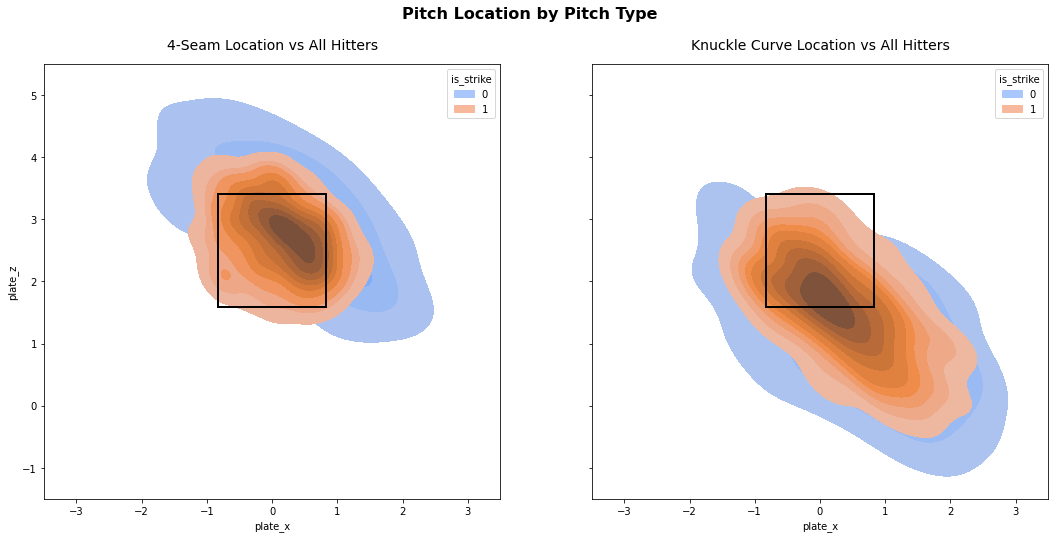

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8), sharex = True, sharey = True)
fig.suptitle('Pitch Location by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0],data=ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('4-Seam Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1],data=kc,x='plate_x',y='plate_z',fill = True,hue='is_strike',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Knuckle Curve Location vs All Hitters', fontsize = 14, pad = 15);

### Hard Hit Summary by Pitch Type
1. 0-85 EV 2. 85-90 EV 3. 90-95 EV 4. 95-100 EV 5. 100+ EV

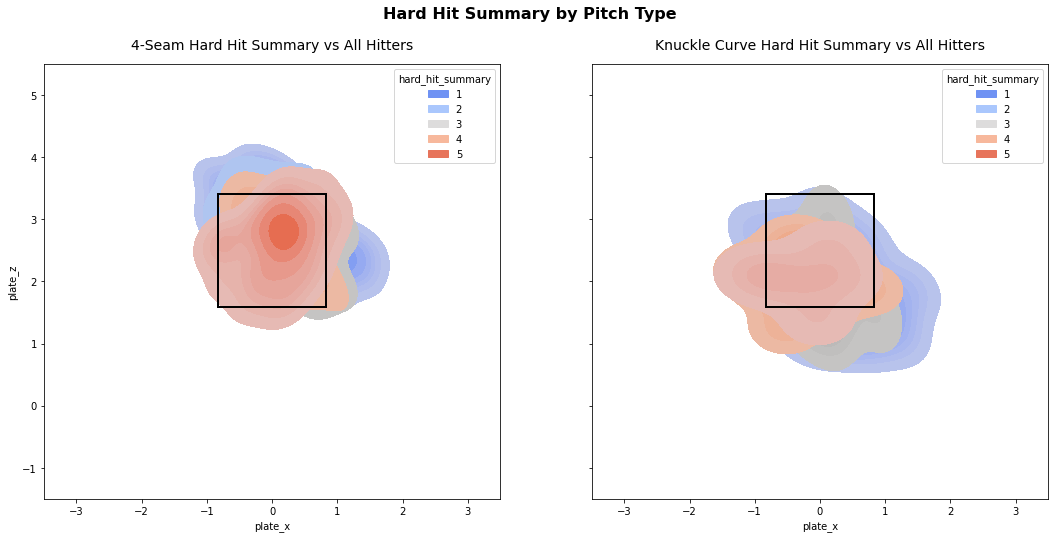

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8), sharex = True, sharey = True)
fig.suptitle('Hard Hit Summary by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0],data=ff,x='plate_x',y='plate_z',fill=True,hue='hard_hit_summary',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('4-Seam Hard Hit Summary vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1],data=kc,x='plate_x',y='plate_z',fill = True,hue='hard_hit_summary',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Knuckle Curve Hard Hit Summary vs All Hitters', fontsize = 14, pad = 15);

### 4-Seam Heatmaps

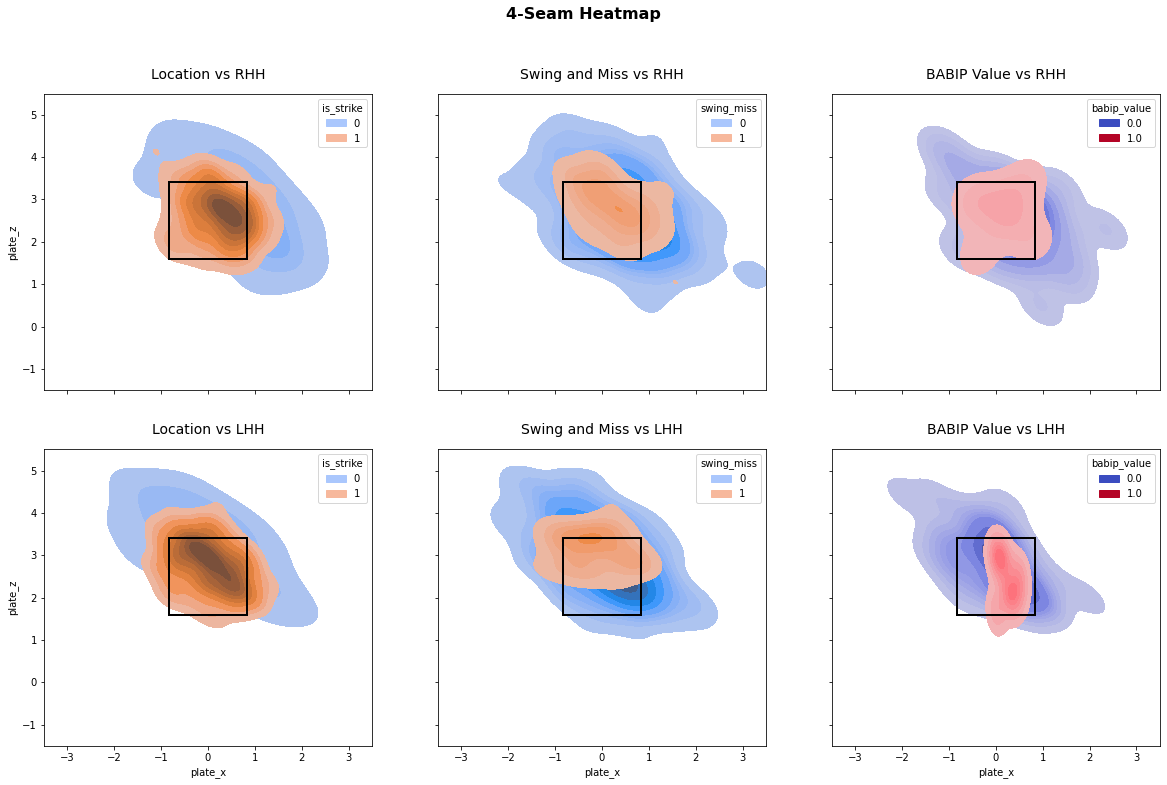

In [23]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('BABIP Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('BABIP Value vs LHH', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

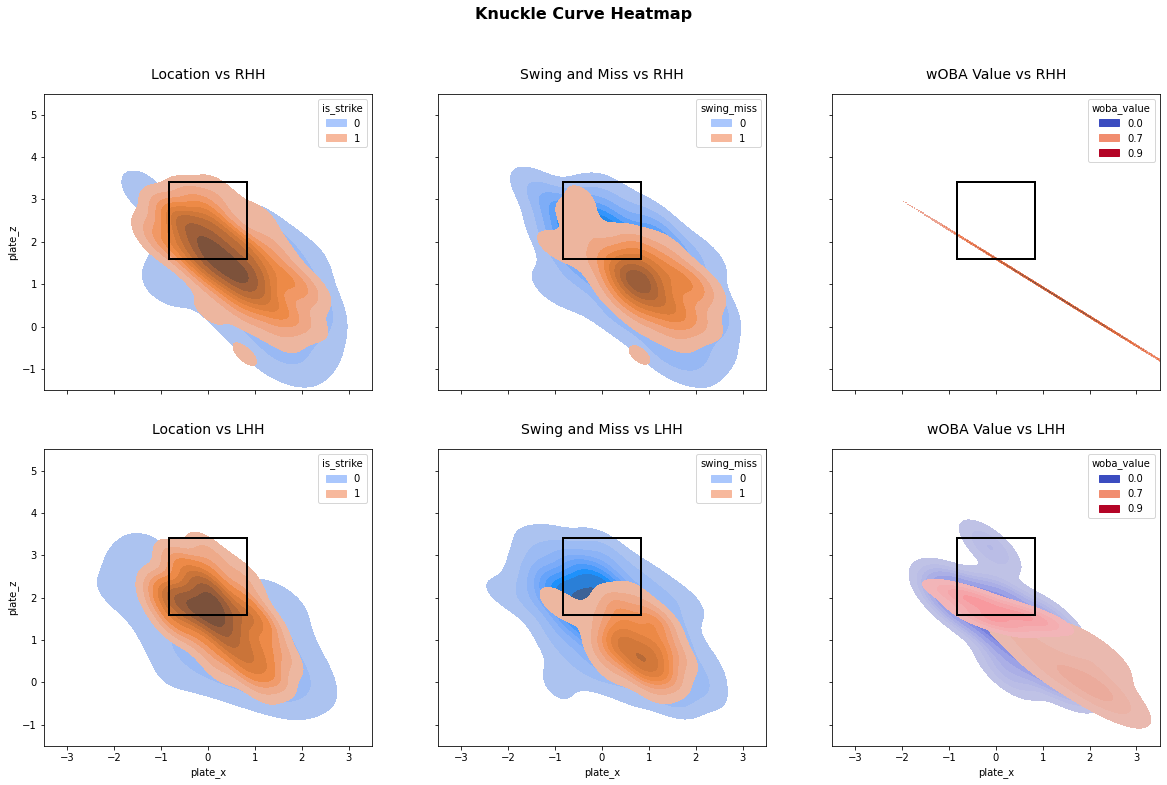

In [24]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_kc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_kc,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_kc,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_kc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_kc,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_kc,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 14, pad = 15);